## Import libraries

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read data from CSV file

In [2]:
IMPUTED_TRAIN_DATA = pd.read_csv('data/imputed_train_data.csv')
IMPUTED_TEST_DATA = pd.read_csv('data/imputed_test_data.csv')

## Visualization of outliers for numerical features

In [3]:
#GET ALL THE NUMERICAL FEATURES
numerical_features = IMPUTED_TRAIN_DATA.select_dtypes(include=[np.number]).columns
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### 1. Checking number of unique values

In [4]:
#CHECKING FOR NUMBER OF UNIQUE VALUES 
def unique_values(df: pd.DataFrame, numerical_features):
    temp_list = []
    for feature in numerical_features:
        unique_vals = df[feature].nunique()
        temp_list.append({'feature': feature, 'unique_vals_count': unique_vals})
    unique_vals_df = pd.DataFrame(temp_list)
    return unique_vals_df

unique_values_df = unique_values(IMPUTED_TRAIN_DATA, numerical_features)
unique_values_df.sort_values(by="unique_vals_count", ascending=False, inplace=True)
unique_values_df

,feature,unique_vals_count
2,LotArea,1073
15,GrLivArea,861
10,BsmtUnfSF,780
12,1stFlrSF,753
11,TotalBsmtSF,721
36,SalePrice,663
8,BsmtFinSF1,637
26,GarageArea,441
13,2ndFlrSF,417
7,MasVnrArea,327


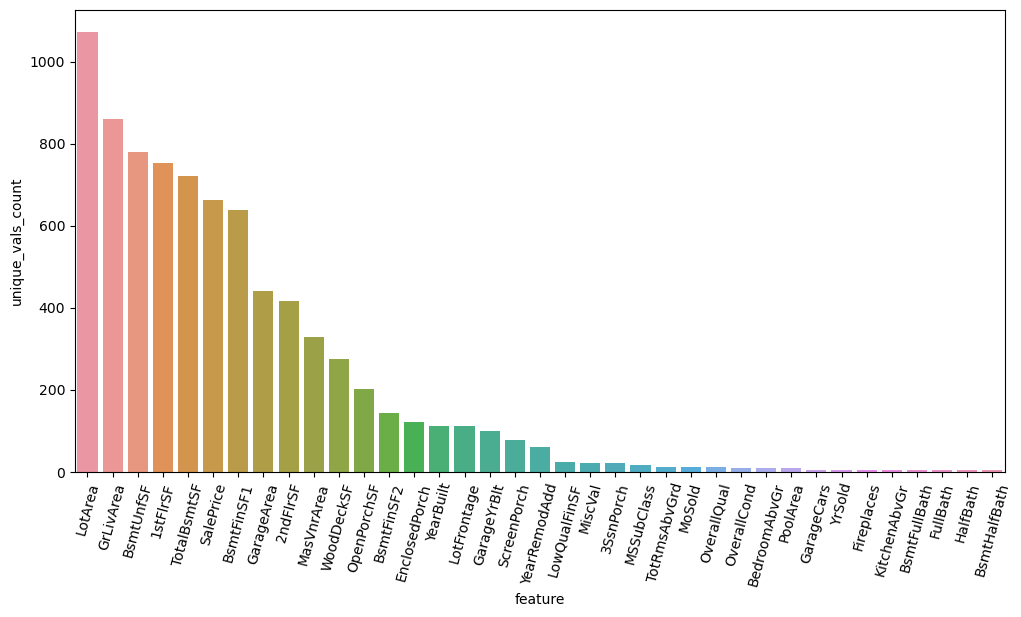

In [5]:
#PLOT NUMBER OF UNIQUE VALUES TO LOOK FOR RELEVANT FEATURES THAT MAY HAVE OUTLINERS
plt.figure(figsize=(12,6))
sns.barplot(data=unique_values_df, y="unique_vals_count", x='feature')
plt.xticks(rotation=75)
plt.show()

In [6]:
#WANT TO LOOK FOR OUTLIERS FOR EVERY FEATURE WITH MORE THAN 50 UNIQUE VALUES
high_unique_features = unique_values_df[unique_values_df["unique_vals_count"] > 50]["feature"].to_list()

### 2. Plot numerical features with a high number of unique values

In [7]:
def plot_outliers(df : pd.DataFrame, feature : str, target : str = "SalePrice"):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    sns.scatterplot(data=IMPUTED_TRAIN_DATA, x=feature, y=target, ax=axes[0])
    sns.boxplot(data=IMPUTED_TRAIN_DATA, y=feature, ax=axes[1])
    plt.tight_layout()
    plt.show()

In [8]:
#SCATTERPLOT AND BOXPLOT FOR SELECTED FEATURES
def plot_outliers_features(df : pd.DataFrame, features : list, target : str = "SalePrice"):
    fig, axes = plt.subplots((len(features)), 2, figsize=(8, 50))
    i = 0
    for feature in features:
        sns.scatterplot(data=IMPUTED_TRAIN_DATA, x=feature, y=target, ax=axes[i,0])
        sns.boxplot(data=IMPUTED_TRAIN_DATA, y=feature, ax=axes[i,1])
        i+=1
    plt.tight_layout()
    plt.show()

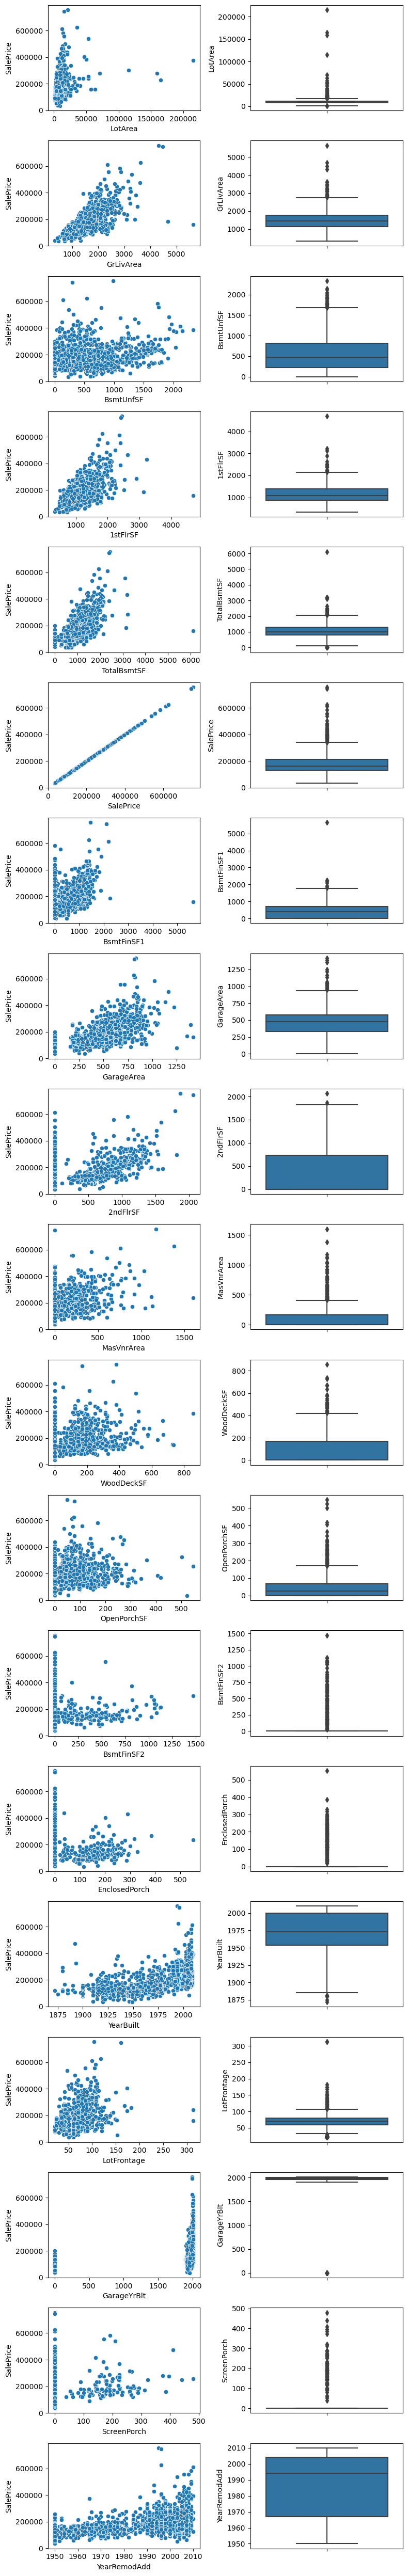

In [9]:
plot_outliers_features(IMPUTED_TRAIN_DATA, high_unique_features)

The following features/columns have some outliers: 
- LotFrontage
- LotArea
- GrLivArea
- BsmtFinSF1
- TotalBsmtSF
- 1stFlrSF
- MasVnrArea

To decide the treshhold for remoiving the outliers we do some more analysis of the datapoints for both the train-set and test-set

### 3. Outlier analysis to find treshholds

In [10]:
def outlier_analysis(train_df : pd.DataFrame, test_df : pd.DataFrame, feature : str): 
    #Scatterplot of the 50 highest value in the train-set and test-set
    fig, axes = plt.subplots(1,3, figsize = (12,4))
    sns.scatterplot(x = train_df[feature].sort_values(ascending=False)[:50], y=[10] * len(train_df[:50]), label = "Train data", color = "blue", ax = axes[0])
    sns.scatterplot(x=test_df[feature].sort_values(ascending=False)[:50], y=[20] * len(test_df[:50]), label = "Test data",color = "red", ax = axes[0])
    axes[0].set_title(f"Fig1: Scatter Plot of {feature} comparing train and test data", fontsize = 10)
    axes[0].grid(True, linestyle='--', alpha=0.5)
    
    #CDF plot of both datasets.  
    sns.ecdfplot(x= train_df[feature], color = "blue", label="Train data", ax = axes[1])
    sns.ecdfplot(test_df[feature], label="Test data", color="red", ax=axes[1])
    axes[1].set_title(f"Fig2: CDF of {feature}", fontsize = 10)
    axes[1].grid(True, linestyle="--", alpha=0.5)
    outlier_threshold = train_df[feature].quantile(0.99)
    axes[1].axvspan(outlier_threshold, train_df[feature].max(), color="red", alpha=0.1, label="Potential Outliers")
    axes[1].legend()
    
    #Scatterplot of all datapoints in trainset with respect to the SalePrice
    sns.scatterplot(train_df, x = feature, y = "SalePrice", ax = axes[2])
    axes[2].set_title(f"Fig 3: Scatterplot of {feature} with respect to SalePrice", fontsize = 10)
    plt.tight_layout()
    plt.show()

#### 3.1 LotArea

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


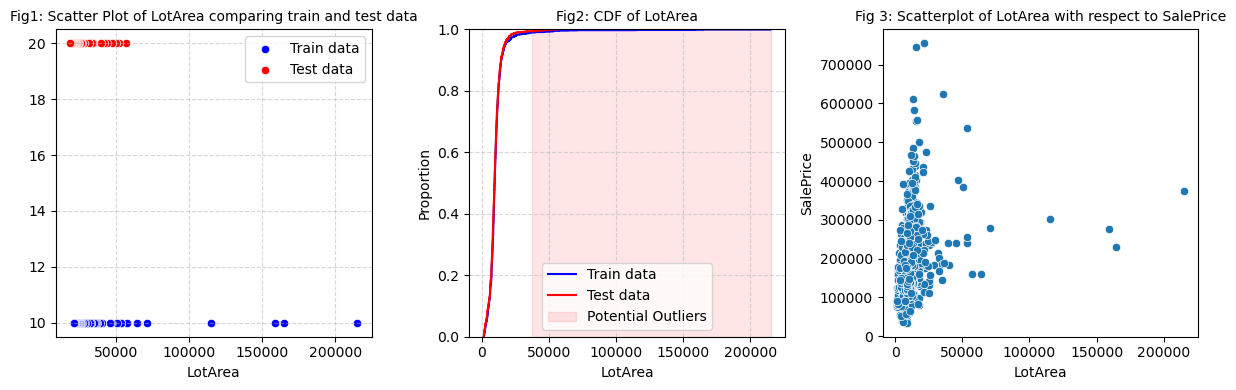

In [11]:
#LOTAREA
outlier_analysis(IMPUTED_TRAIN_DATA, IMPUTED_TEST_DATA, "LotArea")

In Figure 1, we observe a few data points with LotArea values exceeding 100,000, which appear to be outliers, as they are significantly larger than the majority of the data points. Notably, such high values are absent in the test set, suggesting these extreme cases are unique to the training data.

In Figure 3, we can see that these data points with exceptionally high LotArea values do not correspond to proportionally high SalePrice values. Instead, they tend to have relatively low SalePrice values, indicating that these large LotArea properties might not follow the typical relationship between LotArea and SalePrice seen in the rest of the dataset.

Therefore we drop the values above 100000.

In [12]:
#DROP ENTRIES IN TRAIN_DF WITH "LotArea" > 100000
IMPUTED_TRAIN_DATA = IMPUTED_TRAIN_DATA[IMPUTED_TRAIN_DATA["LotArea"] < 100000]

#### 3.2 LotFrontage

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


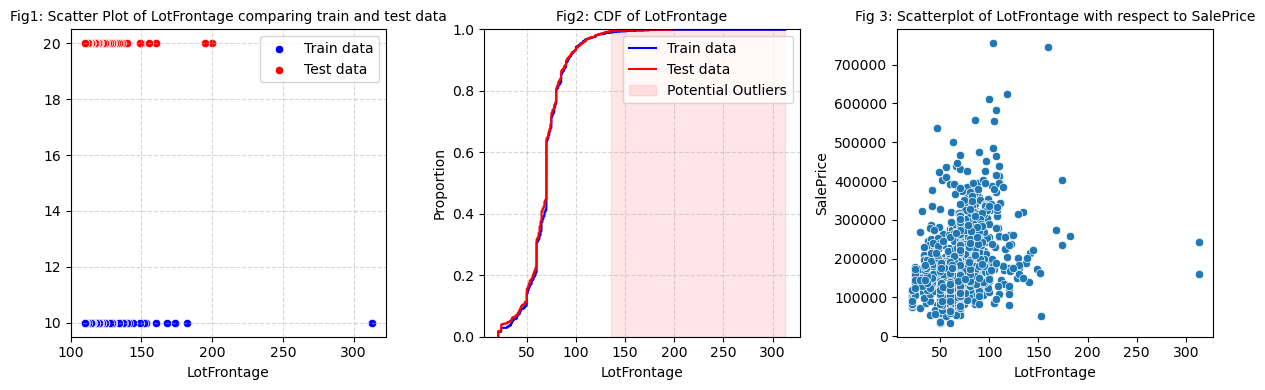

In [13]:
#LOTFRONTAGE
outlier_analysis(IMPUTED_TRAIN_DATA, IMPUTED_TEST_DATA, "LotFrontage")

For LotFrontage, we identify two outliers in the training set with values exceeding 200. These points deviate substantially from the main cluster of data and have no counterparts in the test set, highlighting their uniqueness to the training data.

As shown in the last figure, these high LotFrontage values do not exhibit a clear relationship with SalePrice, indicating that they may be anomalies or extreme cases that don’t align with the general trend of the data. Given their deviation and lack of predictive value, we will exclude all LotFrontage values above 200 from further analysis.

In [14]:
#DROP ENTRIES IN TRAIN_DF WITH "LotFrontage" > 200
IMPUTED_TRAIN_DATA = IMPUTED_TRAIN_DATA[IMPUTED_TRAIN_DATA["LotFrontage"] < 200]

#### 3.3 GrLivArea

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


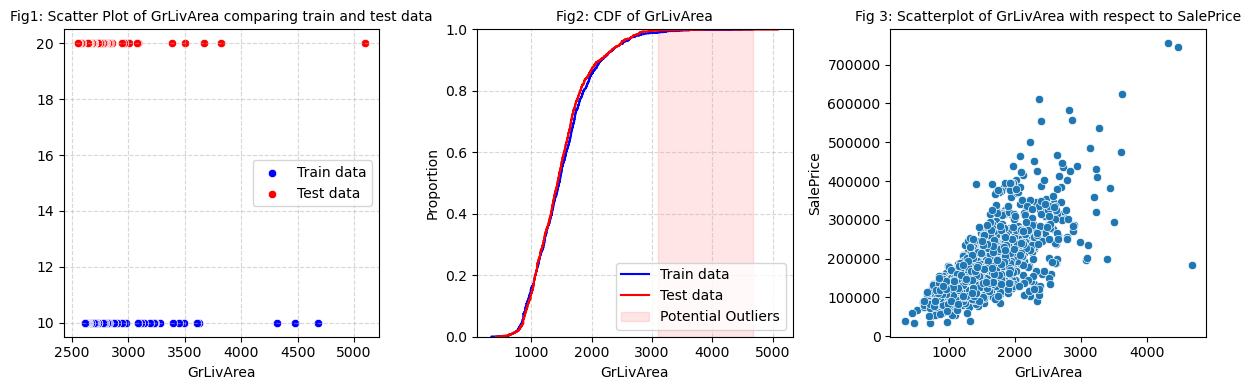

In [15]:
outlier_analysis(IMPUTED_TRAIN_DATA, IMPUTED_TEST_DATA, "GrLivArea")

We observe a single outlier in the traning set for *GrLivArea* with a value exceeding 4500 and an unusually low SalePrice.Therefore, we will exclude this data point from further analysis. Also since there is only one datapoint in the trainset with such a high value, it will do with removing the high datapoint from the training-set- 

In [16]:
#DROP ENTRIES IN TRAIN_DF WITH "GrLivArea" > 4500
IMPUTED_TRAIN_DATA = IMPUTED_TRAIN_DATA[IMPUTED_TRAIN_DATA["GrLivArea"] < 4500]

#### 3.4 BsmtFinSF1

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


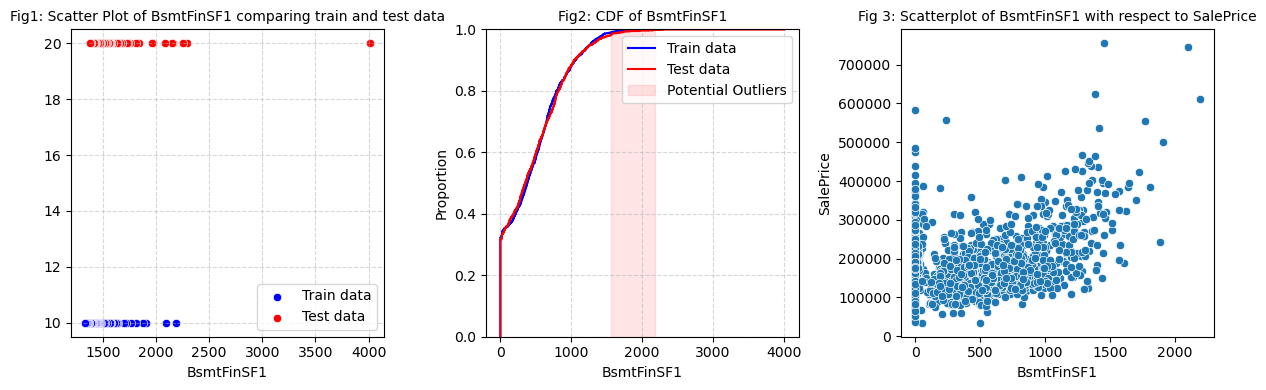

In [17]:
outlier_analysis(IMPUTED_TRAIN_DATA, IMPUTED_TEST_DATA, 'BsmtFinSF1')

For BsmtFinSF1, we observe that the only outlier with a value exceeding 3000 with comparatively low SalePrice has already been removed. Therefore, no additional values need to be dropped from this feature.

#### 3.5 TotalBsmtSF

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


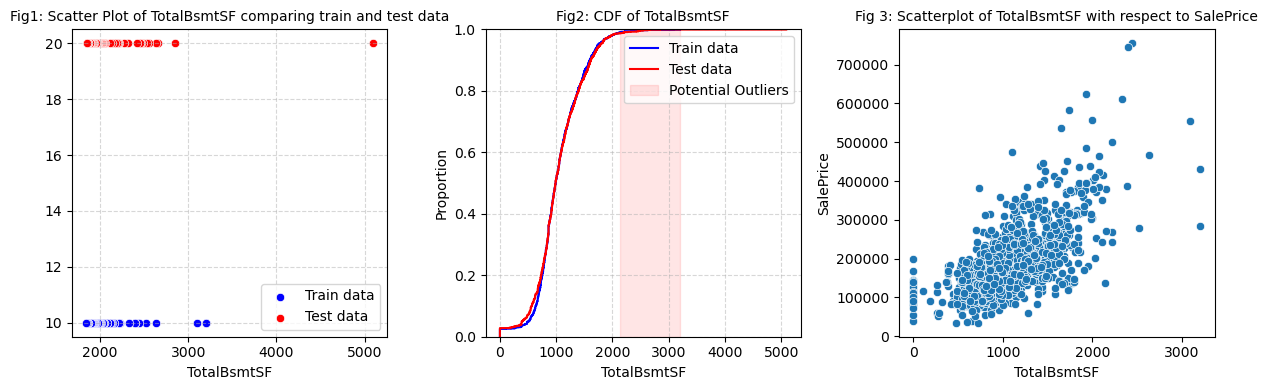

In [18]:
outlier_analysis(IMPUTED_TRAIN_DATA, IMPUTED_TEST_DATA, 'TotalBsmtSF')

The outliers for TotalBsmt exceeding 5000 has already been removed, so no additional values are being dropped. 

#### 3.6 1stFlrSF

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


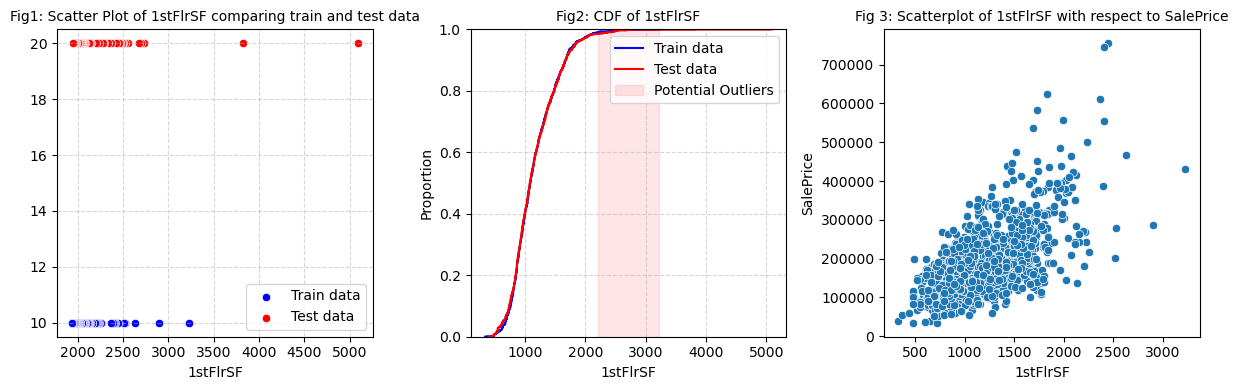

In [19]:
outlier_analysis(IMPUTED_TRAIN_DATA, IMPUTED_TEST_DATA, '1stFlrSF')

The outliers for 1stFlrSF exceeding 3000 has already been removed, so no additional values are being dropped. 

#### 3.7 MasVnrArea

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


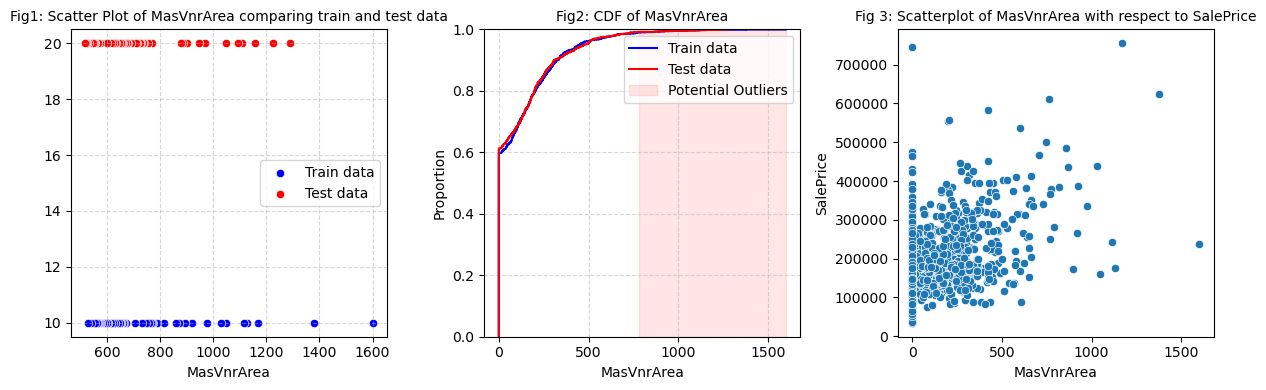

In [20]:
outlier_analysis(IMPUTED_TRAIN_DATA, IMPUTED_TEST_DATA, 'MasVnrArea')

We observe one outlier in the traning set for *MasVnrArea* with a value exceeding 1500 and a comparatively low SalePrice. Therefore, we will drop this value from the training-set. 

In [21]:
#DROP ENTRIES IN TRAIN_DF WITH "MasVnrArea" > 1500
IMPUTED_TRAIN_DATA = IMPUTED_TRAIN_DATA[IMPUTED_TRAIN_DATA["MasVnrArea"] < 1500]